# **XLE index analysis**

In [2]:
# Dependencies and libraries
import numpy as np
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import os
import datetime
import time

from config import api_key
from tickers import energy_industry

In [3]:
# Looking at stock performance by industry relevant indexes

# Variable initialization
close_daily_price =[]
ticker_date = []
delta = datetime.timedelta(days=1)

# Search parameters
industry_index = energy_industry
start_date = datetime.datetime(2020,1,1)
end_date = datetime.datetime(2021,1,1)
base_url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY'

# For loop to create the date column and create the results dataframe
while start_date <= end_date:
    
    ticker_date.append(start_date)
    
    # Building the results dataframe
    ticker_value_df = pd.DataFrame({'Date': ticker_date})
    
    start_date += delta
                                    
# Resetting start date
start_date = datetime.datetime(2019,8,1)
                                    
# For loop to make the call for every industry index and retrieving the data
for ticker in industry_index:
    
    # Building the search url
    url = f'{base_url}&symbol={ticker}&outputsize=full&apikey={api_key}'
    
    # Making the API call
    response = requests.get(url)
    response_json = response.json()
    
    #Progress tracker
    print (f'Processing {ticker} with code {response.status_code}')
    
    # Retrieving daily closing prices
    while start_date <= end_date:
    
        # Obtaining date as string
        string_date = start_date.strftime("%Y-%m-%d")

        # Exception for dates with no operation
        try:
            close_daily_price.append(float(response_json['Time Series (Daily)'][string_date]["4. close"]))
        except (KeyError):
            close_daily_price.append(0)  
        
        start_date += delta
                                    
    # Adding the current ticker to the dataframe
    ticker_value_df[ticker] = pd.Series(close_daily_price)
    close_daily_price.clear()
    start_date = datetime.datetime(2019,8,1)
    time.sleep(12)
    
print("API calls done")

Processing XOM with code 200
Processing CVX with code 200
Processing COP with code 200
Processing EOG with code 200
Processing KMI with code 200
Processing SLB with code 200
Processing MPC with code 200
Processing PSX with code 200
Processing PXD with code 200
Processing VLO with code 200
API calls done


In [4]:
ticker_value_df

,Date,XOM,CVX,COP,EOG,KMI,SLB,MPC,PSX,PXD,VLO
0,2020-01-01,72.46,120.74,58.80,81.07,20.77,38.51,55.36,101.99,127.56,84.34
1,2020-01-02,71.75,120.73,56.47,82.46,20.21,37.42,53.62,99.52,127.27,82.07
2,2020-01-03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-01-04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-01-05,70.28,118.74,54.68,79.00,19.84,35.99,50.67,95.64,121.84,75.78
...,...,...,...,...,...,...,...,...,...,...,...
362,2020-12-28,43.55,89.11,38.96,47.27,14.12,19.15,38.12,63.58,96.55,56.89
363,2020-12-29,44.03,90.07,39.94,48.50,14.53,19.43,39.91,65.58,98.54,59.69
364,2020-12-30,41.87,86.27,37.64,46.58,14.32,18.44,38.08,63.09,95.85,56.33
365,2020-12-31,42.08,83.94,37.39,46.85,14.10,18.14,38.20,62.02,96.92,56.23


In [5]:
# Cleaning the results dataframe

# Dropping rows with no values (no stocks operations)
clean_df = ticker_value_df.loc[ticker_value_df["XOM"]!=0].reset_index(drop=True)
clean_df

# Dropping columns with no data (Indexes not found in the API)

# Creating the list with tickers to keep
keep_columns = []

for column in clean_df:
    column_index = clean_df.columns.get_loc(column)   
    if clean_df.iloc[0, column_index] != 0:
        keep_columns.append(column)
        
clean_df = clean_df[keep_columns]

clean_df

,Date,XOM,CVX,COP,EOG,KMI,SLB,MPC,PSX,PXD,VLO
0,2020-01-01,72.46,120.74,58.80,81.07,20.77,38.51,55.36,101.99,127.56,84.34
1,2020-01-02,71.75,120.73,56.47,82.46,20.21,37.42,53.62,99.52,127.27,82.07
2,2020-01-05,70.28,118.74,54.68,79.00,19.84,35.99,50.67,95.64,121.84,75.78
3,2020-01-06,70.96,119.38,54.23,78.28,20.03,35.46,49.59,97.41,120.23,76.84
4,2020-01-07,70.50,119.10,53.32,77.55,19.97,34.74,48.13,97.33,122.13,75.81
...,...,...,...,...,...,...,...,...,...,...,...
248,2020-12-27,44.07,91.04,39.77,48.56,14.20,19.68,38.52,64.59,98.52,58.03
249,2020-12-28,43.55,89.11,38.96,47.27,14.12,19.15,38.12,63.58,96.55,56.89
250,2020-12-29,44.03,90.07,39.94,48.50,14.53,19.43,39.91,65.58,98.54,59.69
251,2020-12-30,41.87,86.27,37.64,46.58,14.32,18.44,38.08,63.09,95.85,56.33


In [6]:
clean_df.describe()

,XOM,CVX,COP,EOG,KMI,SLB,MPC,PSX,PXD,VLO
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,57.660632,103.828972,50.074585,63.571344,18.213597,27.887826,46.849447,88.222134,114.390791,74.610791
std,12.788134,16.561793,10.796521,15.657730,2.974914,9.204314,14.118958,21.278249,25.536021,17.758681
min,31.450000,54.220000,22.670000,29.760000,9.980000,12.050000,16.620000,42.090000,56.770000,32.620000
25%,44.320000,90.050000,41.580000,48.950000,15.120000,18.200000,36.070000,70.070000,94.110000,59.050000
50%,62.730000,111.120000,53.320000,69.800000,20.000000,32.050000,49.520000,92.640000,123.500000,77.420000
75%,69.250000,117.890000,58.880000,75.600000,20.510000,35.560000,59.840000,105.300000,133.900000,90.250000
max,73.730000,124.900000,66.480000,89.290000,22.240000,40.820000,68.020000,119.700000,158.110000,101.400000


In [7]:
clean_df.dtypes

Date    datetime64[ns]
XOM            float64
CVX            float64
COP            float64
EOG            float64
KMI            float64
SLB            float64
MPC            float64
PSX            float64
PXD            float64
VLO            float64
dtype: object

# **Percentage Price change**

- From our previous analysis we concluded that the energy economic sector suffered a loss of %41.00 during the time period, by analyzing the companies that constitute the index we can clearly see that the tendency continues, but it is interesting to notice that some companies like Pioneer Natural Resource (PXD) was able to soften the blow, a company that is heavily related to low-carbon energy investigation

In [8]:
ticker_list=[]
inititial_price=[]
final_price=[]
#For loop to retrive data
for column in clean_df:
    if column !="Date":
        ticker_list.append(column)
        
        ticker_initial=clean_df.loc[clean_df["Date"]=='2020-01-01',column].tolist()
        inititial_price.append(ticker_initial[0])
        
        ticker_final=clean_df.loc[clean_df["Date"]=='2020-12-31',column].tolist()
        final_price.append(ticker_final[0])
        
                       
#Builiding the price change % dataframe
ava_df=pd.DataFrame({"Ticker":ticker_list,
                    "Initial":inititial_price,
                    "Final":final_price,})

#Comput price change%
ava_df['Percentage Price Change']= (ava_df['Final']-ava_df['Initial'])/(ava_df['Initial'])
ava_df['Percentage Price Change']=(ava_df['Percentage Price Change']*100).map("{:.2f}%".format)
ava_df

,Ticker,Initial,Final,Percentage Price Change
0,XOM,72.46,42.08,-41.93%
1,CVX,120.74,83.94,-30.48%
2,COP,58.80,37.39,-36.41%
3,EOG,81.07,46.85,-42.21%
4,KMI,20.77,14.10,-32.11%
5,SLB,38.51,18.14,-52.90%
6,MPC,55.36,38.20,-31.00%
7,PSX,101.99,62.02,-39.19%
8,PXD,127.56,96.92,-24.02%
9,VLO,84.34,56.23,-33.33%


# **Bar chart analysis**

By looking at the graph we can see that there is no significant difference in the price of a stock and its performance, the relative price different stays relatively the same within the industry

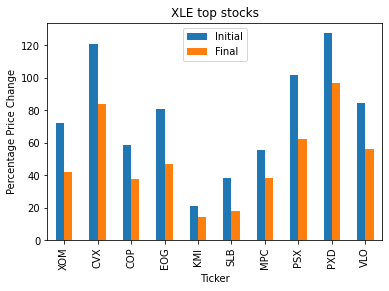

<Figure size 432x288 with 0 Axes>

In [9]:
ava_df.plot(kind="bar")
plt.xticks(ava_df.index.tolist(),ava_df["Ticker"].tolist())
plt.title("XLE top stocks")
plt.xlabel("Ticker")
plt.ylabel("Percentage Price Change")
plt.show()

# Saving to png
filename = 'bar_chart.png'
path = os.path.join('energy_analysis', 'plot_images', filename)
plt.savefig(path)

# **Line graph analysis**

Plotting every stock together do provide very valuable insights, as we can see the stocks had a similar behaviour pre-pandemic, as the WHO announces the pandemic the stocks present a small peak, but as quarantines start around the globe, the behaviour of the stocks are somehow erratic with a notable exception of Pioneer Natural Resources (PXD) a company that starts to separate itself from the rest of the stocks. Now, what we believe is one of the most notable phenomena is how all the stocks converge to a couple of weeks after the announcement of Phase 1 vaccines testing. Every stock apparently plummets and tries to converge to a minimum value, and after that, the stock begins to stabilize and recover

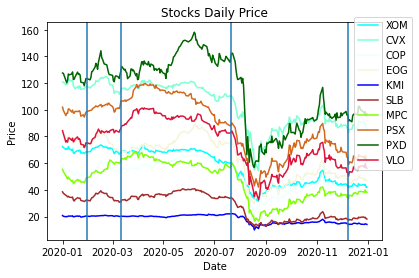

In [10]:
# Generate a scatter plot XPH 
x_axis = clean_df["Date"]

fig1, ax1 = plt.subplots()
plt.title('Stocks Daily Price')
plt.xlabel('Date')
plt.ylabel('Price')

# Creating all the ticker daily lines
plt.plot(x_axis, clean_df["XOM"],linewidth=1.5, markersize=0,marker="o",color="aqua", label='XOM')
plt.plot(x_axis, clean_df["CVX"],linewidth=1.5, markersize=0,marker="o",color="aquamarine", label='CVX')
plt.plot(x_axis, clean_df["COP"],linewidth=1.5, markersize=0,marker="o",color="azure", label='COP')
plt.plot(x_axis, clean_df["EOG"],linewidth=1.5, markersize=0,marker="o",color="beige", label='EOG')
plt.plot(x_axis, clean_df["KMI"],linewidth=1.5, markersize=0,marker="o",color="blue", label='KMI')
plt.plot(x_axis, clean_df["SLB"],linewidth=1.5, markersize=0,marker="o",color="brown", label='SLB')
plt.plot(x_axis, clean_df["MPC"],linewidth=1.5, markersize=0,marker="o",color="chartreuse", label='MPC')
plt.plot(x_axis, clean_df["PSX"],linewidth=1.5, markersize=0,marker="o",color="chocolate", label='PSX')
plt.plot(x_axis, clean_df["PXD"],linewidth=1.5, markersize=0,marker="o",color="darkgreen", label='PXD')
plt.plot(x_axis, clean_df["VLO"],linewidth=1.5, markersize=0,marker="o",color="crimson", label='VLO')


# Create vertical lines with relevant dates
cov_str=datetime.datetime.strptime("2020-01-30","%Y-%m-%d")
cov_np=datetime.datetime.strptime("2020-03-11","%Y-%m-%d")
cov_testv=datetime.datetime.strptime("2020-07-21","%Y-%m-%d")
cov_en=datetime.datetime.strptime("2020-12-08","%Y-%m-%d")
plt.axvline(x=cov_str)
plt.axvline(x=cov_en)
plt.axvline(x=cov_testv)
plt.axvline(x=cov_np)
plt.legend(bbox_to_anchor=(0.9,0.3))

# Saving to png
filename = 'line_chart.png'
path = os.path.join('energy_analysis', 'plot_images', filename)
plt.savefig(path, transparent=False)

# **Minimum price**

Throughout our study we have been noticing that around early August, 2020 the general economy hits its lowest point during the pandemic, in an attempt to understand this situation we need to isolate the exact date, or dates, at which this happened

From the analysis we can determine that the dates of interest is the week between August 18th and the 23rd

Relevant worldwide events during that week where
- Joe Biden accepts its candidacy for the republican party
- The week before riots happened in the capitol, during this week several public voices condemn trump's administration management of the pandemic

In [69]:
# Obtaining minimums from stock df
min_date = clean_df.copy(deep = True).set_index('Date', drop=True)
min_date = min_date.idxmin()

min_date        

XOM   2020-08-23
CVX   2020-08-23
COP   2020-08-18
EOG   2020-08-18
KMI   2020-08-18
SLB   2020-08-18
MPC   2020-08-23
PSX   2020-08-23
PXD   2020-08-18
VLO   2020-08-23
dtype: datetime64[ns]

In [11]:
clean_df

,Date,XOM,CVX,COP,EOG,KMI,SLB,MPC,PSX,PXD,VLO
0,2020-01-01,72.46,120.74,58.80,81.07,20.77,38.51,55.36,101.99,127.56,84.34
1,2020-01-02,71.75,120.73,56.47,82.46,20.21,37.42,53.62,99.52,127.27,82.07
2,2020-01-05,70.28,118.74,54.68,79.00,19.84,35.99,50.67,95.64,121.84,75.78
3,2020-01-06,70.96,119.38,54.23,78.28,20.03,35.46,49.59,97.41,120.23,76.84
4,2020-01-07,70.50,119.10,53.32,77.55,19.97,34.74,48.13,97.33,122.13,75.81
...,...,...,...,...,...,...,...,...,...,...,...
248,2020-12-27,44.07,91.04,39.77,48.56,14.20,19.68,38.52,64.59,98.52,58.03
249,2020-12-28,43.55,89.11,38.96,47.27,14.12,19.15,38.12,63.58,96.55,56.89
250,2020-12-29,44.03,90.07,39.94,48.50,14.53,19.43,39.91,65.58,98.54,59.69
251,2020-12-30,41.87,86.27,37.64,46.58,14.32,18.44,38.08,63.09,95.85,56.33
